In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sqlalchemy import create_engine
from ds100_utils import fetch_and_cache


plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
sns.set()

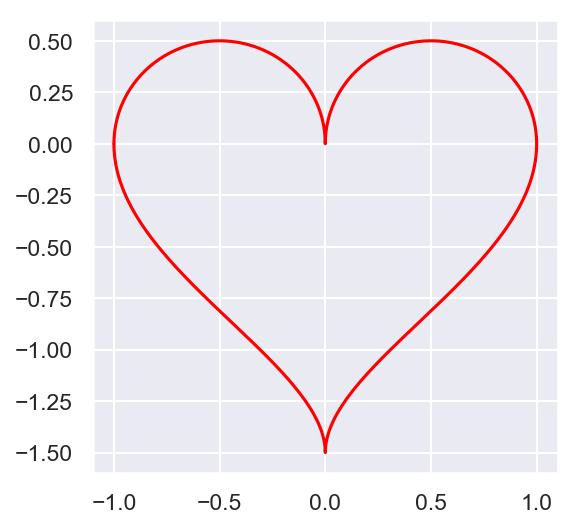

In [3]:
# From https://github.com/susam/heart/blob/master/heart.py
x = np.linspace(-1, 1, 10001)
y1 = np.sqrt(1 - np.abs(x)) * np.sqrt(np.abs(x))
y2 = (-3/2) * np.sqrt(1 - np.sqrt((np.abs(x))))
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='red');

In [4]:
import sqlite3
conn = sqlite3.connect('test.db')

In [5]:
conn.executescript("""
DROP TABLE IF EXISTS s;
DROP TABLE IF EXISTS t;

CREATE TABLE s(
    m INTEGER PRIMARY KEY, 
    u TEXT
);

INSERT INTO s VALUES 
    (1, 'W'),
    (2, 'X'),
    (3, 'X'),
    (4, 'Y');

CREATE TABLE t(
    n TEXT PRIMARY KEY, 
    v CHAR
);

INSERT INTO t VALUES 
    ('A', 'X'),
    ('B', 'X'),
    ('C', 'Y'),
    ('D', 'Z');
""");

In [6]:
def print_sql(s):
    print('>', s)
    for result in conn.execute(s):
        print(result)

print_sql('SELECT * FROM s;')
print_sql('SELECT * FROM t;')

> SELECT * FROM s;
(1, 'W')
(2, 'X')
(3, 'X')
(4, 'Y')
> SELECT * FROM t;
('A', 'X')
('B', 'X')
('C', 'Y')
('D', 'Z')


In [7]:
print_sql('SELECT * FROM s, t;')

> SELECT * FROM s, t;
(1, 'W', 'A', 'X')
(1, 'W', 'B', 'X')
(1, 'W', 'C', 'Y')
(1, 'W', 'D', 'Z')
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(2, 'X', 'C', 'Y')
(2, 'X', 'D', 'Z')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(3, 'X', 'C', 'Y')
(3, 'X', 'D', 'Z')
(4, 'Y', 'A', 'X')
(4, 'Y', 'B', 'X')
(4, 'Y', 'C', 'Y')
(4, 'Y', 'D', 'Z')


In [8]:
print_sql('SELECT * FROM s JOIN t ON s.u = t.v;')
print_sql('SELECT * FROM s, t WHERE s.u = t.v;')


> SELECT * FROM s JOIN t ON s.u = t.v;
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')
> SELECT * FROM s, t WHERE s.u = t.v;
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')


In [9]:
print_sql('SELECT * FROM t LEFT JOIN s ON s.u = t.v')

> SELECT * FROM t LEFT JOIN s ON s.u = t.v
('A', 'X', 2, 'X')
('A', 'X', 3, 'X')
('B', 'X', 2, 'X')
('B', 'X', 3, 'X')
('C', 'Y', 4, 'Y')
('D', 'Z', None, None)


In [10]:
print_sql('SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;')
print_sql('SELECT s.m, s.u, t.n, t.v FROM s LEFT JOIN t ON s.u = t.v UNION '
          'SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;')

> SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;
(2, 'X', 'A', 'X')
(3, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')
(None, None, 'D', 'Z')
> SELECT s.m, s.u, t.n, t.v FROM s LEFT JOIN t ON s.u = t.v UNION SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;
(None, None, 'D', 'Z')
(1, 'W', None, None)
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')


In [11]:
# From https://www.imdb.com/interfaces/
fetch_and_cache('https://datasets.imdbws.com/title.basics.tsv.gz', 'titles.tsv.gz')
fetch_and_cache('https://datasets.imdbws.com/name.basics.tsv.gz', 'names.tsv.gz')
!gunzip -kf data/titles.tsv.gz
!gunzip -kf data/names.tsv.gz
!ls -lh data

Using cached version that was downloaded (UTC): Thu Feb 14 13:33:25 2019
Using cached version that was downloaded (UTC): Thu Feb 14 13:45:15 2019
total 2616352
-rw-r--r--  1 denero  staff   525M Feb 14 13:45 names.tsv
-rw-r--r--  1 denero  staff   171M Feb 14 13:45 names.tsv.gz
-rw-r--r--  1 denero  staff   456M Feb 14 13:33 titles.tsv
-rw-r--r--  1 denero  staff    96M Feb 14 13:33 titles.tsv.gz


In [12]:
!head -n5 data/titles.tsv

tconst	titleType	primaryTitle	originalTitle	isAdult	startYear	endYear	runtimeMinutes	genres
tt0000001	short	Carmencita	Carmencita	0	1894	\N	1	Documentary,Short
tt0000002	short	Le clown et ses chiens	Le clown et ses chiens	0	1892	\N	5	Animation,Short
tt0000003	short	Pauvre Pierrot	Pauvre Pierrot	0	1892	\N	4	Animation,Comedy,Romance
tt0000004	short	Un bon bock	Un bon bock	0	1892	\N	\N	Animation,Short


In [13]:
!head -n5 data/names.tsv

nconst	primaryName	birthYear	deathYear	primaryProfession	knownForTitles
nm0000001	Fred Astaire	1899	1987	soundtrack,actor,miscellaneous	tt0050419,tt0072308,tt0043044,tt0053137
nm0000002	Lauren Bacall	1924	2014	actress,soundtrack	tt0037382,tt0117057,tt0071877,tt0038355
nm0000003	Brigitte Bardot	1934	\N	actress,soundtrack,producer	tt0054452,tt0057345,tt0059956,tt0049189
nm0000004	John Belushi	1949	1982	actor,writer,soundtrack	tt0072562,tt0080455,tt0078723,tt0077975


In [14]:
!wc data/*.tsv

 9137587 63117470 551012544 data/names.tsv
 5639859 76759985 478563393 data/titles.tsv
 14777446 139877455 1029575937 total


In [15]:
# How to crash your kernel:
# pd.read_csv('data/names.tsv', sep='\t')

In [16]:
# Instead, use sqlite3 (must be run from the terminal)
"""
$ sqlite3 imdb.db
sqlite> .mode tabs
sqlite> .import data/titles.tsv titles
sqlite> .import data/names.tsv names
""";

In [17]:
conn = sqlite3.connect('imdb.db')
print_sql('SELECT * FROM titles LIMIT 10;')

> SELECT * FROM titles LIMIT 10;
('tt0000001', 'short', 'Carmencita', 'Carmencita', '0', '1894', '\\N', '1', 'Documentary,Short')
('tt0000002', 'short', 'Le clown et ses chiens', 'Le clown et ses chiens', '0', '1892', '\\N', '5', 'Animation,Short')
('tt0000003', 'short', 'Pauvre Pierrot', 'Pauvre Pierrot', '0', '1892', '\\N', '4', 'Animation,Comedy,Romance')
('tt0000004', 'short', 'Un bon bock', 'Un bon bock', '0', '1892', '\\N', '\\N', 'Animation,Short')
('tt0000005', 'short', 'Blacksmith Scene', 'Blacksmith Scene', '0', '1893', '\\N', '1', 'Comedy,Short')
('tt0000006', 'short', 'Chinese Opium Den', 'Chinese Opium Den', '0', '1894', '\\N', '1', 'Short')
('tt0000007', 'short', 'Corbett and Courtney Before the Kinetograph', 'Corbett and Courtney Before the Kinetograph', '0', '1894', '\\N', '1', 'Short,Sport')
('tt0000008', 'short', 'Edison Kinetoscopic Record of a Sneeze', 'Edison Kinetoscopic Record of a Sneeze', '0', '1894', '\\N', '1', 'Documentary,Short')
('tt0000009', 'movie', 'Mis

In [18]:
for exp in conn.execute('SELECT sql FROM sqlite_master;'):
    print(exp[0])

CREATE TABLE titles(
  "tconst" TEXT,
  "titleType" TEXT,
  "primaryTitle" TEXT,
  "originalTitle" TEXT,
  "isAdult" TEXT,
  "startYear" TEXT,
  "endYear" TEXT,
  "runtimeMinutes" TEXT,
  "genres" TEXT
)
CREATE TABLE romance(
  id TEXT,
  title TEXT,
  time INT,
  year INT
)
CREATE TABLE names(
  "nconst" TEXT,
  "primaryName" TEXT,
  "birthYear" TEXT,
  "deathYear" TEXT,
  "primaryProfession" TEXT,
  "knownForTitles" TEXT
)
CREATE TABLE romantics(
  name TEXT,
  gender,
  born INT,
  title TEXT,
  year INT
)


In [19]:
# Python string substitution (new in Python 3.6)
who, where = 'John', 'here'
f"{who} is {where}"

'John is here'

In [20]:
key = 'tconst'
title = 'primaryTitle'
time = 'runtimeMinutes'
year = 'startYear'
adult = 'isAdult'
kind = 'titleType'

select_romance = f'''
    SELECT {key} AS id,
           {title} AS title, 
           CAST({time} AS int) AS time, 
           CAST({year} AS int) AS year
    FROM titles
    WHERE genres LIKE '%Romance%' AND
          year > 1900 AND 
          {adult} = '0' AND
          {kind} = 'movie' AND
          time > 60 AND time < 180
    '''
conn.executescript(f'''
    DROP TABLE IF EXISTS romance;
    CREATE TABLE romance AS {select_romance};
    ''')
print_sql('SELECT * FROM romance LIMIT 10')

> SELECT * FROM romance LIMIT 10
('tt0002026', 'Anny - Story of a Prostitute', 68, 1912)
('tt0004635', 'The Squaw Man', 74, 1914)
('tt0005073', 'The Chalice of Courage', 65, 1915)
('tt0005832', 'On the Night Stage', 62, 1915)
('tt0006359', 'The Americano', 61, 1916)
('tt0006456', 'La vie de Bohème', 112, 1916)
('tt0006614', 'The Dumb Girl of Portici', 112, 1916)
('tt0006719', 'The Girl Philippa', 70, 1916)
('tt0006728', "God's Country and the Woman", 80, 1916)
('tt0006780', "Hell's Hinges", 64, 1916)


In [68]:
df = pd.read_sql('SELECT * FROM romance', conn)
df.head()

,id,title,time,year
0,tt0002026,Anny - Story of a Prostitute,68,1912
1,tt0004635,The Squaw Man,74,1914
2,tt0005073,The Chalice of Courage,65,1915
3,tt0005832,On the Night Stage,62,1915
4,tt0006359,The Americano,61,1916


In [22]:
df.shape

(22960, 4)

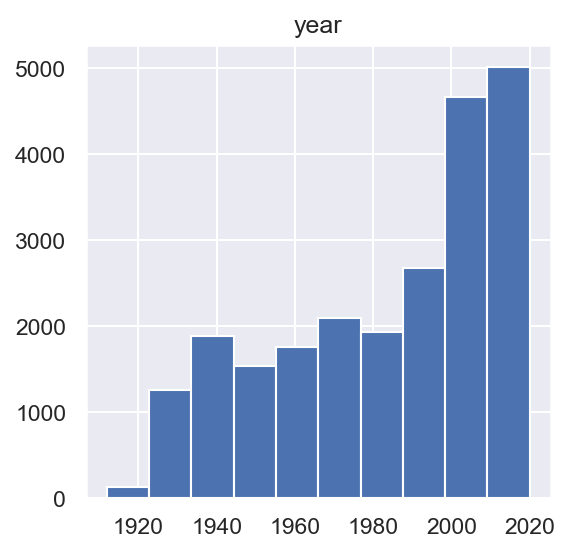

In [23]:
df.hist('year');

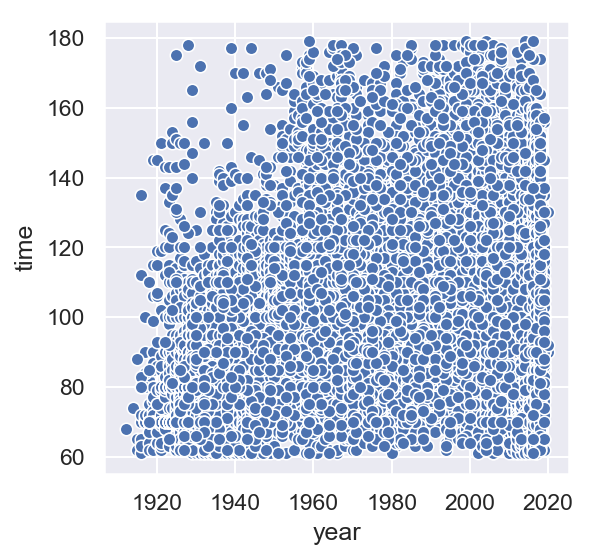

In [24]:
sns.scatterplot(df['year'], df['time']);

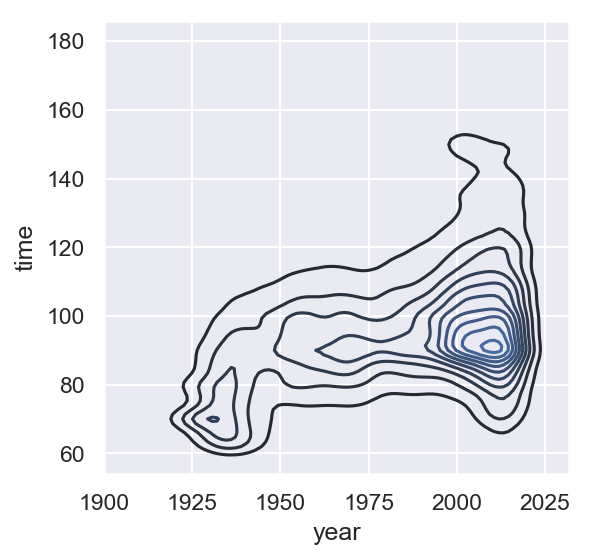

In [25]:
sns.kdeplot(df['year'], df['time']);

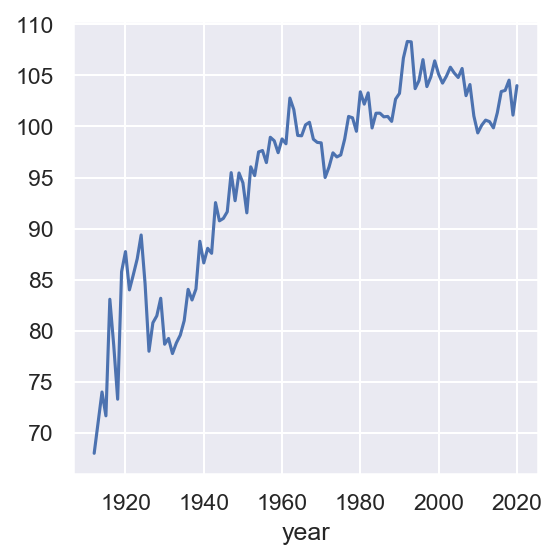

In [26]:
df['time'].groupby(df['year']).mean().plot();

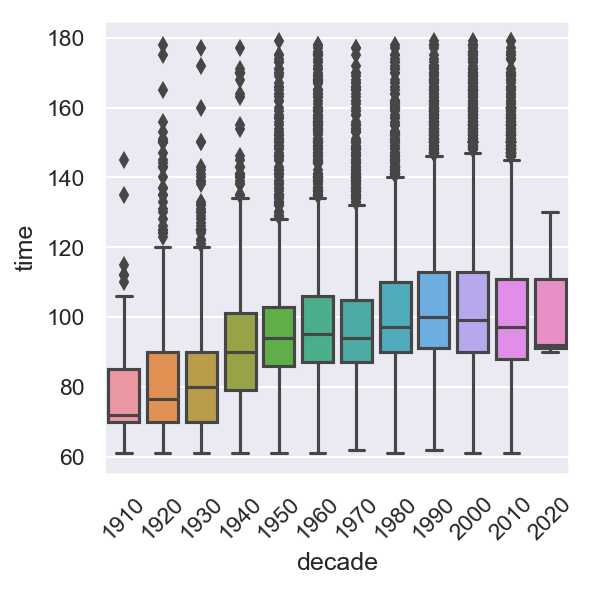

In [27]:
df['decade'] = (df['year'] // 10) * 10
sns.boxplot('decade', 'time', data=df)
plt.xticks(rotation=45);

In [64]:
pd.read_sql('SELECT * FROM romance ORDER BY RANDOM() LIMIT 3', conn)

,id,title,time,year
0,tt5226426,Aattakatha,135,2013
1,tt0193557,Terrace on the Roof,110,1995
2,tt0268401,Kahin Pyaar Na Ho Jaaye,159,2000


In [65]:
three_years = '''
    SELECT year FROM romance 
         GROUP BY year 
         ORDER BY RANDOM() LIMIT 3
    '''
cluster_sample = f'''
    SELECT * FROM romance 
    WHERE year IN ({three_years})
    '''
pd.read_sql(f'''
    SELECT year, COUNT(*) 
    FROM ({cluster_sample}) 
    GROUP BY year
    ''', conn)

,year,COUNT(*)
0,1936,187
1,1954,171
2,1980,154


In [66]:
pd.read_sql('SELECT * FROM names LIMIT 10;', conn)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0043044,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0057345,tt0059956,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0072562,tt0080455,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0050976,tt0069467"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0036855,tt0038109,tt0038787,tt0071877"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer","tt0037382,tt0043265,tt0033870,tt0034583"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0068646,tt0047296,tt0078788"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,soundtrack","tt0087803,tt0057877,tt0059749,tt0061184"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0029870,tt0035575,tt0031867,tt0055256"


In [79]:
name = 'primaryName'
known = 'knownForTitles'
profession = 'primaryProfession'
born = 'birthYear'

select_actors = f'''
    SELECT {name} AS name, 
           CAST({born} AS int) AS born,
           SUBSTR({known}, 0, INSTR({known}, ',')) AS movie_id,
           CASE WHEN {profession} LIKE '%actor%' THEN 'actor' 
                WHEN {profession} LIKE '%actress%' THEN 'actress'   
                END AS profession
    FROM names
    WHERE {profession} LIKE '%act%' AND
          born > 1800
    '''
pd.read_sql(f'{select_actors} LIMIT 10', conn)

,name,born,movie_id,profession
0,Fred Astaire,1899,tt0050419,actor
1,Lauren Bacall,1924,tt0037382,actress
2,Brigitte Bardot,1934,tt0054452,actress
3,John Belushi,1949,tt0072562,actor
4,Ingmar Bergman,1918,tt0083922,actor
5,Ingrid Bergman,1915,tt0036855,actress
6,Humphrey Bogart,1899,tt0037382,actor
7,Marlon Brando,1924,tt0070849,actor
8,Richard Burton,1925,tt0087803,actor
9,James Cagney,1899,tt0029870,actor


In [80]:
select = f'''
    SELECT name, profession, born, title, year FROM
    ({select_actors}) JOIN
    romance
    ON movie_id = id;
    '''
conn.executescript(f'''
    DROP TABLE IF EXISTS romantics;
    CREATE TABLE romantics AS {select};
    ''')
pd.read_sql('SELECT * FROM romantics LIMIT 10', conn)

,name,profession,born,title,year
0,Fred Astaire,actor,1899,Funny Face,1957
1,Lauren Bacall,actress,1924,To Have and Have Not,1944
2,Humphrey Bogart,actor,1899,To Have and Have Not,1944
3,Marlon Brando,actor,1924,Last Tango in Paris,1972
4,Gary Cooper,actor,1901,The Pride of the Yankees,1942
5,Bette Davis,actress,1908,"Now, Voyager",1942
6,Doris Day,actress,1922,The Glass Bottom Boat,1966
7,Clark Gable,actor,1901,It Happened One Night,1934
8,John Gielgud,actor,1904,Arthur,1981
9,Audrey Hepburn,actress,1929,Roman Holiday,1953


In [81]:
pd.read_sql('''
    SELECT name, born, year,
       CASE WHEN born < 1980 THEN 'old' 
            WHEN born < 2000 THEN 'not too old' 
            ELSE 'young' END AS age,
       CASE year % 10 WHEN 0 THEN 'start of decade'
                      WHEN 5 THEN 'middle of decade'
                      END AS time
    FROM romantics
    ''', conn).sample(10)

,name,born,year,age,time
16561,Gohar Gasparyan,1924,1969,old,None
16694,Dimitri Molimis,1982,2007,not too old,None
178,John Gavin,1931,1967,old,None
6504,Lisa Howard,1963,1989,old,None
16608,Ryszard Nawrocki,1940,1969,old,None
7134,Ceyda Karahan,1953,1974,old,None
4977,Tomoko Fujita,1965,1995,old,middle of decade
6251,Hannah Herzsprung,1981,2008,not too old,None
349,Carl R. Botefuhr,1925,1942,old,None
1046,Georges Aubrey,1928,1976,old,None


In [82]:
df = pd.read_sql('SELECT * FROM romantics', conn)
df.shape

(19803, 5)

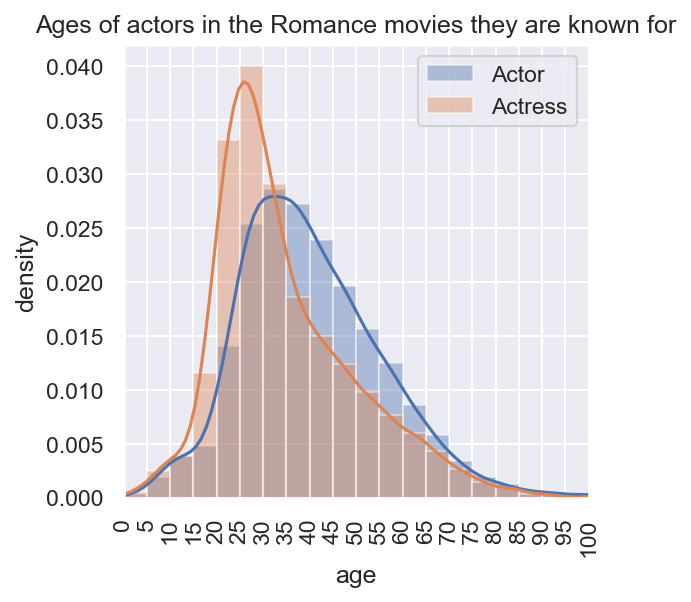

In [103]:
df['age'] = df['year'] - df['born']
bins = np.linspace(0, 100, 21)
sns.distplot(df[df['profession']=='actor']['age'], bins=bins)
sns.distplot(df[df['profession']=='actress']['age'], bins=bins)
plt.legend(labels=['Actor', 'Actress'])
plt.xticks(bins, rotation=90)
plt.xlim(0, 100)
plt.ylabel('density');
plt.title('Ages of actors in the Romance movies they are known for');